# Table of Content
01. Import Libraries
02. Import Data
03. Create and Export Visualizations: 
- (Q5.1) What’s the distribution among users in regards to their brand loyalty?
- (Q5.2) Are there differences in ordering habits based on a customer’s loyalty status?
- (Q5.3) Are there differences in ordering habits based on a customer’s region?
- (Q5.4) Is there a connection between age and family status in terms of ordering habits?

# 01. Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Adjust the setting to view all columns in this notebook
pd.options.display.max_columns = None

# 02. Import Data

In [3]:
# Define the main folder project path
path = r'C:\Users\saich\Desktop\CareerFoundry\Data Immersion\Achievement 4 Python Fundamentals for Data Analysts\04-2023 Instacart Basket Analysis (github)'

In [4]:
# Import 'orders_products_all_flagged' data set from 'Prepared Data' folder
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all_flagged.pkl'))

In [5]:
ords_prods_all.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spender_flag,median_order_interval,order_frequency_flag,gender,state,age,date_joined,dependant_counts,family_status,income,_merge,region,customer_profile,income_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regular busy,Regular busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Big family,Low income
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regular busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Big family,Low income
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regular busy,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Big family,Low income
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Big family,Low income
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Big family,Low income


In [6]:
ords_prods_all.shape

(32399732, 34)

# 03. Create and Export Visualizations

### (Q5.1) What’s the distribution among users in regards to their brand loyalty?
- 01. Bar chart: no of orders vs loyalty_flag
- 02. Bar chart: no of users vs loyalty_flag
- 03. Bar chart: orders/user vs loyalty_flag

#### Q5.1_01. Bar chart: no of orders vs loyalty_flag

In [7]:
# Find the number of orders across 'loyalty_flag'
ords_prods_all['loyalty_flag'].value_counts(dropna = False).sort_index()

Loyal customer      10282763
New customer         6242841
Regular customer    15874128
Name: loyalty_flag, dtype: int64

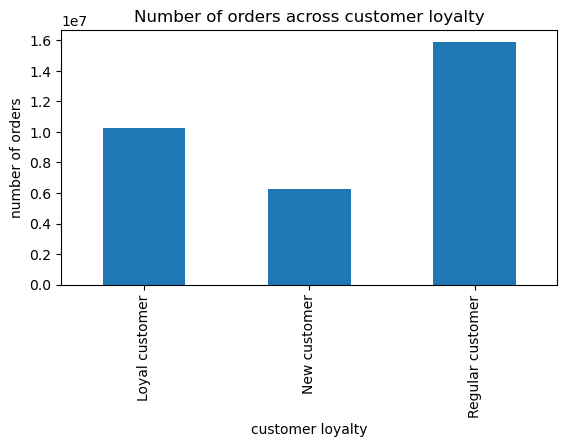

In [8]:
# Create a bar chart based on the frequency table above
bar_order_count_vs_loyalty_flag = ords_prods_all['loyalty_flag'].value_counts(dropna = False).sort_index().plot.bar(title = 'Number of orders across customer loyalty', xlabel = 'customer loyalty', ylabel = 'number of orders')
plt.subplots_adjust(bottom = 0.35)

In [9]:
# Export bar_order_count_vs_loyalty_flag
bar_order_count_vs_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.1', 'Q5.1_01 (bar) order_count vs loyalty_flag.png'))

#### Q5.1_02. Bar chart: no of users vs loyalty_flag

In [10]:
# Find the number of users acorss 'loyalty_flag'
ords_prods_all.groupby('loyalty_flag')['user_id'].nunique().sort_index()

loyalty_flag
Loyal customer       17017
New customer        112328
Regular customer     76864
Name: user_id, dtype: int64

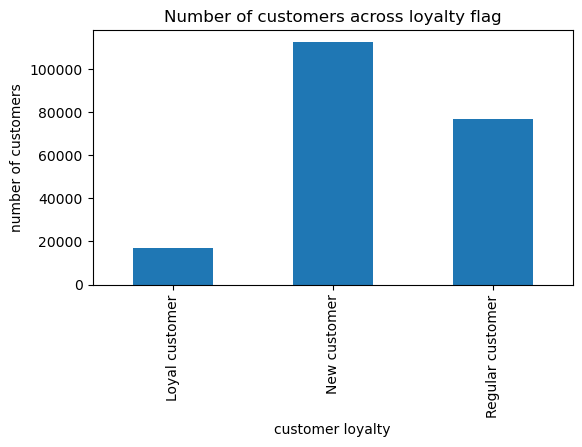

In [11]:
# Create a bar chart based on the frequency table above
bar_user_count_vs_loyalty_flag = ords_prods_all.groupby('loyalty_flag')['user_id'].nunique().sort_index().plot.bar(title = 'Number of customers across loyalty flag', xlabel = 'customer loyalty', ylabel = 'number of customers')
plt.subplots_adjust(bottom = 0.35, left = 0.15)

In [12]:
# Export bar_user_count_vs_loyalty_flag
bar_user_count_vs_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.1', 'Q5.1_02 (bar) user_count vs loyalty_flag.png'))

#### Q5.1_03. Bar chart: orders/user vs loyalty_flag

In [13]:
# Find the number of orders per user across 'loyalty_flag'
grouped_loyalty_flag = ords_prods_all.groupby('loyalty_flag')
pivot_order_per_user_vs_loyalty_flag = grouped_loyalty_flag['order_id'].count() / grouped_loyalty_flag['user_id'].nunique()
pivot_order_per_user_vs_loyalty_flag 

loyalty_flag
Loyal customer      604.264148
New customer         55.576891
Regular customer    206.522273
dtype: float64

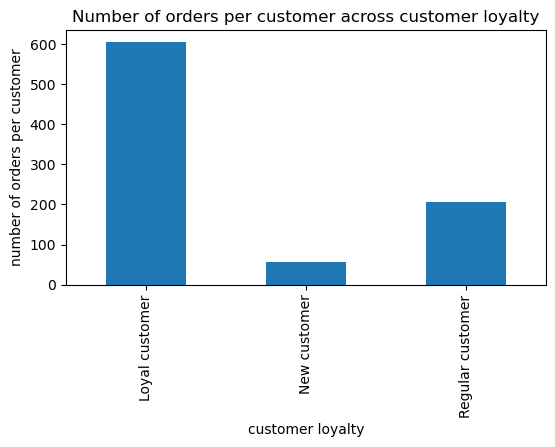

In [14]:
# Create a bar chart based on the frequency table above
bar_order_per_user_vs_loyalty_flag = pivot_order_per_user_vs_loyalty_flag.plot.bar(title = 'Number of orders per customer across customer loyalty', xlabel = 'customer loyalty', ylabel = 'number of orders per customer')
plt.subplots_adjust(bottom = 0.35, left = 0.15)

In [15]:
# Export bar_order_per_user_vs_loyalty_flag
bar_order_per_user_vs_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.1', 'Q5.1_03 (bar) order_per_user vs loyalty_flag.png'))

### (Q5.2) Are there differences in ordering habits based on a customer’s loyalty status?
- 01. Bar chart: prices mean vs loyalty_flag
- 02. Percentage stacked bar chart: price_range vs loyalty_flag
- 03. Bar chart: days_since_prior_order mean vs loyalty_flag
- 04. Bar chart: department orders vs loyalty_flag
- 05. Bar chart: department orders of loyal customer
- 06. Bar chart: department orders of new customer
- 07. Bar chart: department orders of regular customer

#### Q5.2_01. Bar chart: prices mean vs loyalty_flag

In [16]:
# Find the average order price across 'loyalty_flag'
ords_prods_all.groupby('loyalty_flag')['prices'].mean()

loyalty_flag
Loyal customer      7.773574
New customer        7.801206
Regular customer    7.798262
Name: prices, dtype: float32

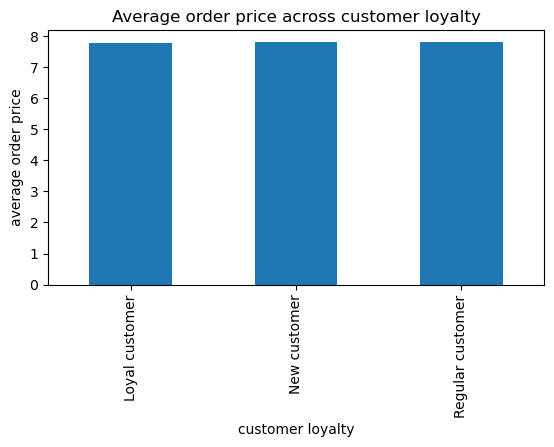

In [17]:
# Create a bar chart based on the frequency table above
bar_prices_mean_vs_loyalty_flag = ords_prods_all.groupby('loyalty_flag')['prices'].mean().plot.bar(title = 'Average order price across customer loyalty', xlabel = 'customer loyalty', ylabel = 'average order price')
plt.subplots_adjust(bottom = 0.35)

In [18]:
# Export bar_prices_mean_vs_loyalty_flag
bar_prices_mean_vs_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.2', 'Q5.2_01 (bar) prices_mean vs loyalty_flag.png'))

#### Q5.2_02. Percentage stacked bar chart: price_range vs loyalty_flag

In [19]:
# Find the number of orders of different 'price_range' across different 'loyalty_flag'
ct_price_range_vs_loyalty_flag = pd.crosstab(ords_prods_all['loyalty_flag'], ords_prods_all['price_range'])
ct_price_range_vs_loyalty_flag

price_range,High-range product,Low-range product,Mid-range product
loyalty_flag,,,
Loyal customer,118606,3214690,6949467
New customer,84503,1952769,4205569
Regular customer,209442,4958862,10705824


In [20]:
# Convert the values in 'ct_price_range_vs_loyalty_flag' into a percentage of each row
ct_percent_price_range_vs_loyalty_flag = ct_price_range_vs_loyalty_flag.div(ct_price_range_vs_loyalty_flag.sum(axis = 1), axis = 0)
ct_percent_price_range_vs_loyalty_flag

price_range,High-range product,Low-range product,Mid-range product
loyalty_flag,,,
Loyal customer,0.011534,0.312629,0.675837
New customer,0.013536,0.312801,0.673663
Regular customer,0.013194,0.312386,0.674420


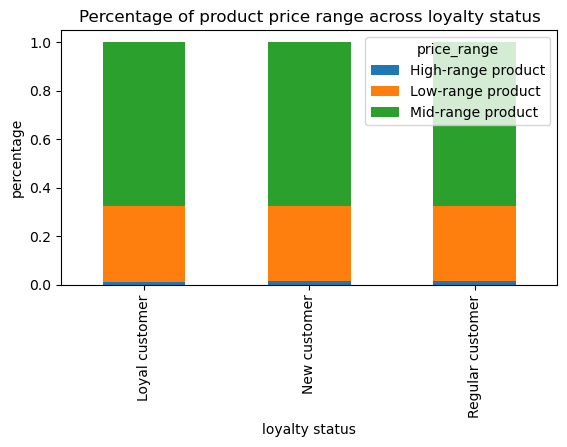

In [21]:
# Create the percentage bar chart of price_range vs loyalty_flag 
bar_percent_price_range_vs_loyalty_flag = ct_percent_price_range_vs_loyalty_flag.plot.bar(stacked = True, title = 'Percentage of product price range across loyalty status', xlabel = 'loyalty status', ylabel = 'percentage')
plt.subplots_adjust(bottom = 0.35)

In [23]:
# Export bar_percent_price_range_vs_loyalty_flag
bar_percent_price_range_vs_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.2', 'Q5.2_02 (percent bar) price_range vs loyalty_flag.png'))

#### Q5.2_03. Bar chart: days_since_prior_order mean vs loyalty_flag

In [24]:
# Find the average 'days_since_prior_order' across 'loyalty_flag'
ords_prods_all.groupby('loyalty_flag')['days_since_prior_order'].mean()

loyalty_flag
Loyal customer       6.026625
New customer        17.976856
Regular customer    12.155101
Name: days_since_prior_order, dtype: float32

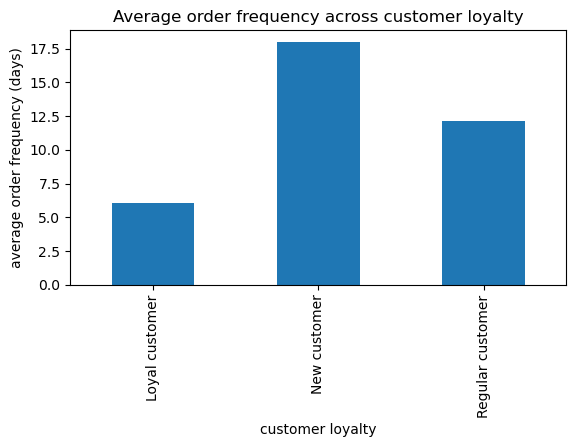

In [25]:
# Create a bar chart based on the frequency table above
bar_days_since_prior_order_mean_vs_loyalty_flag = ords_prods_all.groupby('loyalty_flag')['days_since_prior_order'].mean().plot.bar(title = 'Average order frequency across customer loyalty', xlabel = 'customer loyalty', ylabel = 'average order frequency (days)')
plt.subplots_adjust(bottom = 0.35)

In [26]:
# Export bar_days_since_prior_order_mean_vs_loyalty_flag
bar_days_since_prior_order_mean_vs_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.2', 'Q5.2_03 (bar) days_since_prior_order_mean vs loyalty_flag.png'))

#### Q5.2_04. Bar chart: department orders vs loyalty_flag

In [27]:
# Find the number of orders in different departments across 'loyalty_flag'
ct_dept_orders_vs_loyalty_flag = pd.crosstab(ords_prods_all['department_id'], ords_prods_all['loyalty_flag'])
ct_dept_orders_vs_loyalty_flag

loyalty_flag,Loyal customer,New customer,Regular customer
department_id,,,
1,609460,485283,1140000
2,10715,7719,17857
3,379873,223704,568851
4,3147376,1736622,4595293
5,38723,37698,77275
6,78394,57103,133756
7,855017,512871,1320235
8,25469,20536,51711
9,242580,189327,434720


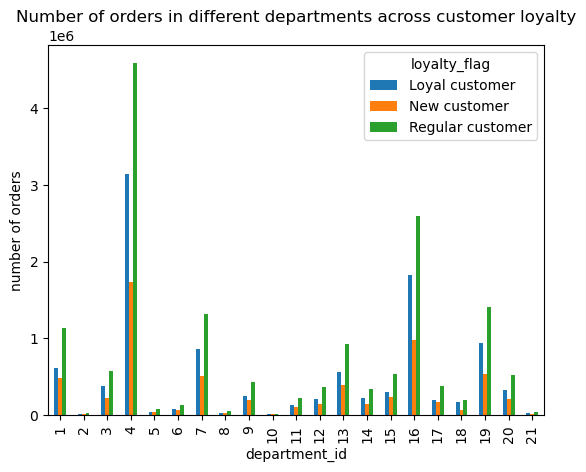

In [28]:
# Create a bar chart based on the frequency table above
bar_dept_orders_vs_loyalty_flag = ct_dept_orders_vs_loyalty_flag.plot.bar(title = 'Number of orders in different departments across customer loyalty', xlabel = 'department_id', ylabel = 'number of orders')

In [29]:
# Export bar_dept_orders_vs_loyalty_flag
bar_dept_orders_vs_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.2', 'Q5.2_04 (bar) dept_orders vs loyalty_flag.png'))

#### Q5.2_05. Bar chart: department orders of loyal customer

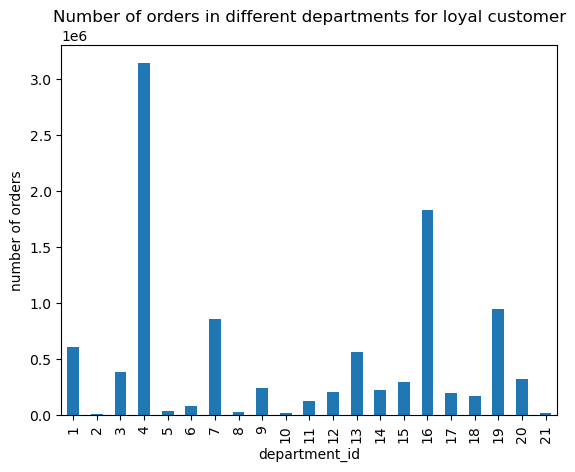

In [30]:
# Create a bar chart based on the first column (loyal customer) of 'ct_dept_orders_vs_loyalty_flag' above
bar_dept_orders_loyal_cust = ct_dept_orders_vs_loyalty_flag.iloc[:, 0].plot.bar(title = 'Number of orders in different departments for loyal customer', xlabel = 'department_id', ylabel = 'number of orders')

In [31]:
# Export bar_dept_orders_loyal_cust
bar_dept_orders_loyal_cust.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.2', 'Q5.2_05 (bar) dept_orders_loyal_cust.png'))

#### Q5.2_06. Bar chart: department orders of new customer

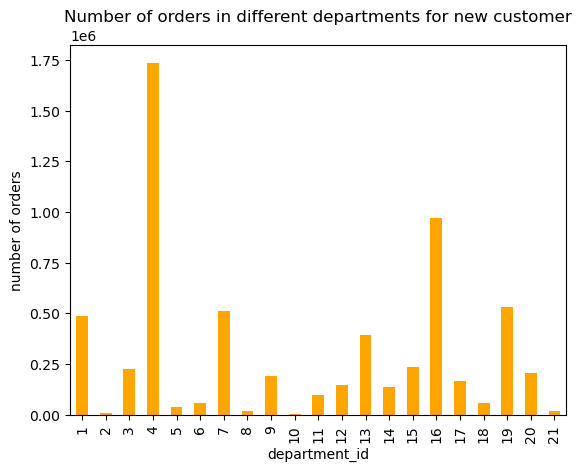

In [32]:
# Create a bar chart based on the second column (new customer) of 'ct_dept_orders_vs_loyalty_flag' above
bar_dept_orders_new_cust = ct_dept_orders_vs_loyalty_flag.iloc[:, 1].plot.bar(title = 'Number of orders in different departments for new customer', xlabel = 'department_id', ylabel = 'number of orders', color = ['orange'])

In [33]:
# Export bar_dept_orders_new_cust
bar_dept_orders_new_cust.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.2', 'Q5.2_06 (bar) dept_orders_new_cust.png'))

#### Q5.2_07. Bar chart: department orders of regular customer

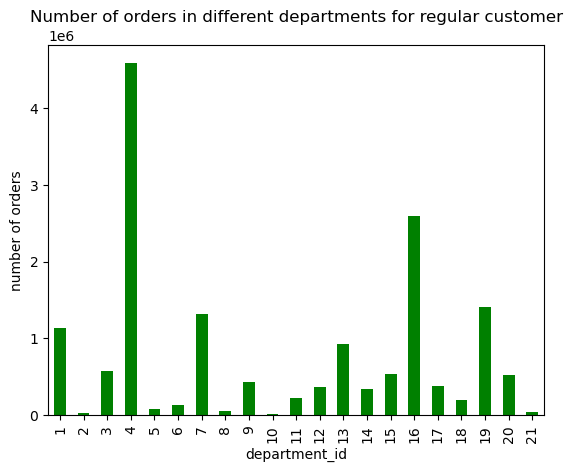

In [34]:
# Create a bar chart based on the third column (regular customer) of 'ct_dept_orders_vs_loyalty_flag' above
bar_dept_orders_regular_cust = ct_dept_orders_vs_loyalty_flag.iloc[:, 2].plot.bar(title = 'Number of orders in different departments for regular customer', xlabel = 'department_id', ylabel = 'number of orders', color = ['green'])

In [35]:
# Export bar_dept_orders_regular_cust
bar_dept_orders_regular_cust.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.2', 'Q5.2_07 (bar) dept_orders_regular_cust.png'))

### (Q5.3) Are there differences in ordering habits based on a customer’s region?
- 01. Bar chart: no of orders vs region
- 02. Bar chart: no of users vs region
- 03. Bar chart: orders/user vs region
- 04. Bar chart: prices mean vs region
- 05. Percentage stacked bar chart: price_range vs region
- 06. Bar chart: days_since_prior_order mean vs region
- 07. Bar chart: department orders vs region
- 08. Bar chart: department orders in Midwest
- 09. Bar chart: department orders in Northeast
- 10. Bar chart: department orders in South
- 11. Bar chart: department orders in West

#### Q5.3_01. Bar chart: no of orders vs region

In [36]:
# Find the number of orders across 'region'
ords_prods_all['region'].value_counts(dropna = False).sort_index()

Midwest       7596065
Northeast     5721892
South        10790096
West          8291679
Name: region, dtype: int64

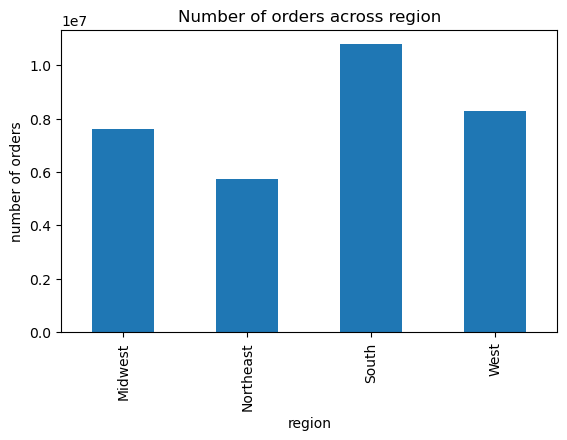

In [37]:
# Create a bar chart based on the frequency table above
bar_order_count_vs_region = ords_prods_all['region'].value_counts(dropna = False).sort_index().plot.bar(title = 'Number of orders across region', xlabel = 'region', ylabel = 'number of orders')
plt.subplots_adjust(bottom = 0.25)

In [38]:
# Export bar_order_count_vs_region
bar_order_count_vs_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.3', 'Q5.3_01 (bar) order_count vs region.png'))

#### Q5.3_02. Bar chart: no of users vs region

In [39]:
# Find the number of users across 'region'
ords_prods_all.groupby('region')['user_id'].nunique()

region
Midwest      48519
Northeast    36388
South        68737
West         52565
Name: user_id, dtype: int64

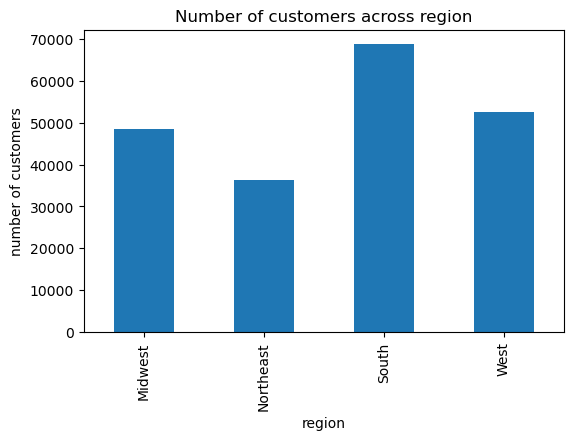

In [40]:
# Create a bar chart based on the frequency table above
bar_user_count_vs_region = ords_prods_all.groupby('region')['user_id'].nunique().plot.bar(title = 'Number of customers across region', xlabel = 'region', ylabel = 'number of customers')
plt.subplots_adjust(bottom = 0.25, left = 0.15)

In [41]:
# Export bar_user_count_vs_region
bar_user_count_vs_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.3', 'Q5.3_02 (bar) user_count vs region.png'))

#### Q5.3_03. Bar chart: orders/user vs region

In [42]:
# Find the number of orders per user across 'region'
grouped_region = ords_prods_all.groupby('region')
pivot_order_per_user_vs_region = grouped_region['order_id'].count() / grouped_region['user_id'].nunique()
pivot_order_per_user_vs_region

region
Midwest      156.558565
Northeast    157.246675
South        156.976534
West         157.741444
dtype: float64

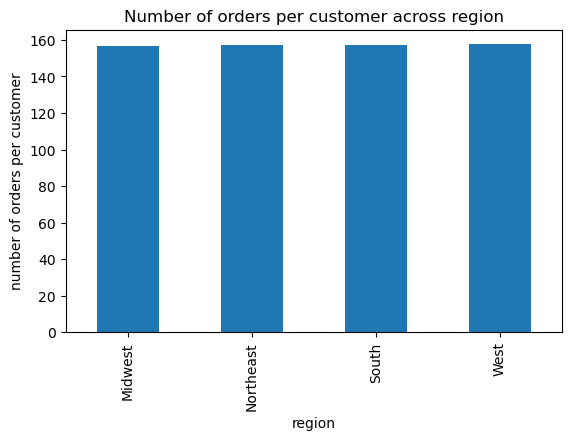

In [43]:
# Create a bar chart based on the frequency table above
bar_order_per_user_vs_region = pivot_order_per_user_vs_region.plot.bar(title = 'Number of orders per customer across region', xlabel = 'region', ylabel = 'number of orders per customer')
plt.subplots_adjust(bottom = 0.25)

In [44]:
# Export bar_order_per_user_vs_region
bar_order_per_user_vs_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.3', 'Q5.3_03 (bar) order_per_user vs region.png'))

#### Q5.3_04. Bar chart: prices mean vs region

In [45]:
# Find the average order price across 'region'
ords_prods_all.groupby('region')['prices'].mean()

region
Midwest      7.792584
Northeast    7.782409
South        7.794918
West         7.790356
Name: prices, dtype: float32

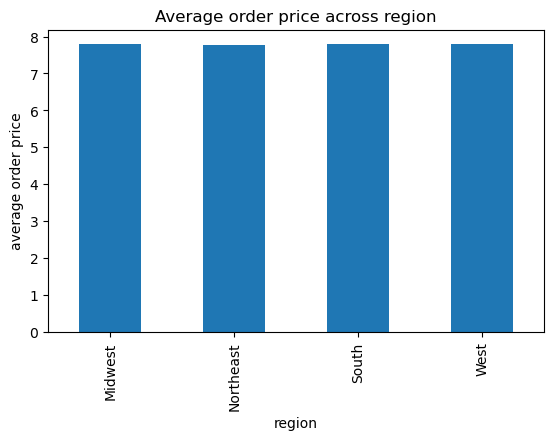

In [46]:
# Create a bar chart based on the frequency table above
bar_prices_mean_vs_region = ords_prods_all.groupby('region')['prices'].mean().plot.bar(title = 'Average order price across region', xlabel = 'region', ylabel = 'average order price')
plt.subplots_adjust(bottom = 0.25)

In [47]:
# Export bar_prices_mean_vs_region
bar_prices_mean_vs_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.3', 'Q5.3_04 (bar) prices_mean vs region.png'))

#### Q5.3_05. Percentage stacked bar chart: price_range vs region

In [48]:
# Find the number of orders of different 'price_range' across different 'region'
ct_price_range_vs_region = pd.crosstab(ords_prods_all['region'], ords_prods_all['price_range'])
ct_price_range_vs_region

price_range,High-range product,Low-range product,Mid-range product
region,,,
Midwest,96658,2372304,5127103
Northeast,72358,1792943,3856591
South,137601,3368338,7284157
West,105934,2592736,5593009


In [49]:
# Convert the values in 'ct_price_range_vs_region' into a percentage of each row
ct_percent_price_range_vs_region = ct_price_range_vs_region.div(ct_price_range_vs_region.sum(axis = 1), axis = 0)
ct_percent_price_range_vs_region

price_range,High-range product,Low-range product,Mid-range product
region,,,
Midwest,0.012725,0.312307,0.674968
Northeast,0.012646,0.313348,0.674006
South,0.012753,0.312169,0.675078
West,0.012776,0.312691,0.674533


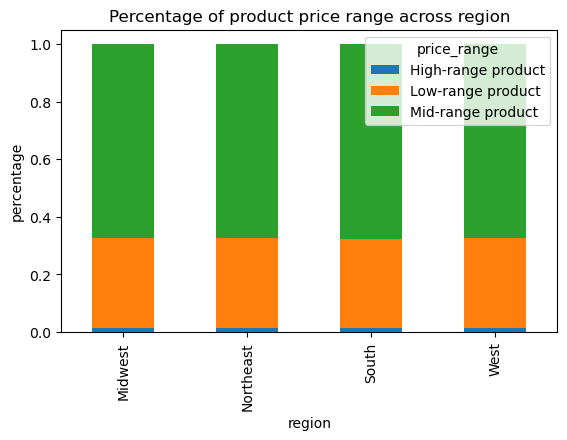

In [50]:
# Create the percentage bar chart of price_range vs region 
bar_percent_price_range_vs_region = ct_percent_price_range_vs_region.plot.bar(stacked = True, title = 'Percentage of product price range across region', xlabel = 'region', ylabel = 'percentage')
plt.subplots_adjust(bottom = 0.25)

In [51]:
# Export bar_percent_price_range_vs_region
bar_percent_price_range_vs_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.3', 'Q5.3_05 (percent bar) price_range vs region.png'))

#### Q5.3_06. Bar chart: days_since_prior_order mean vs region

In [52]:
# Find the average 'days_since_prior_order' across 'region'
ords_prods_all.groupby('region')['days_since_prior_order'].mean()

region
Midwest      11.181731
Northeast    11.075653
South        11.108030
West         11.046985
Name: days_since_prior_order, dtype: float32

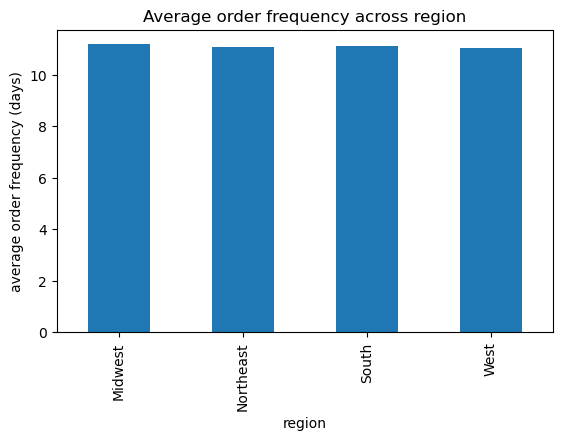

In [53]:
# Create a bar chart based on the frequency table above
bar_days_since_prior_order_mean_vs_region = ords_prods_all.groupby('region')['days_since_prior_order'].mean().plot.bar(title = 'Average order frequency across region', xlabel = 'region', ylabel = 'average order frequency (days)')
plt.subplots_adjust(bottom = 0.25)

In [54]:
# Export bar_days_since_prior_order_mean_vs_region
bar_days_since_prior_order_mean_vs_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.3', 'Q5.3_06 (bar) days_since_prior_order_mean vs region.png'))

#### Q5.3_07. Bar chart: department orders vs region

In [55]:
# Find the number of orders in different departments across 'region'
ct_dept_orders_vs_region = pd.crosstab(ords_prods_all['department_id'], ords_prods_all['region'])
ct_dept_orders_vs_region

region,Midwest,Northeast,South,West
department_id,,,,
1,524096,390918,747900,571829
2,8420,6585,12212,9074
3,273869,208599,388815,301145
4,2227937,1665839,3160551,2424964
5,36186,26542,51624,39344
6,63736,46891,89142,69484
7,625574,483418,898940,680191
8,22355,18601,31269,25491
9,203769,151816,287444,223598


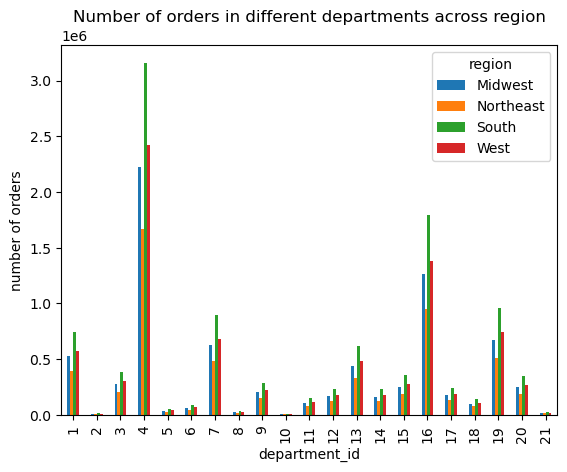

In [56]:
# Create a bar chart based on the frequency table above
bar_dept_orders_vs_region = ct_dept_orders_vs_region.plot.bar(title = 'Number of orders in different departments across region', xlabel = 'department_id', ylabel = 'number of orders')

In [57]:
# Export bar_dept_orders_vs_region
bar_dept_orders_vs_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.3', 'Q5.3_07 (bar) dept_orders vs region.png'))

#### Q5.3_08. Bar chart: department orders in Midwest

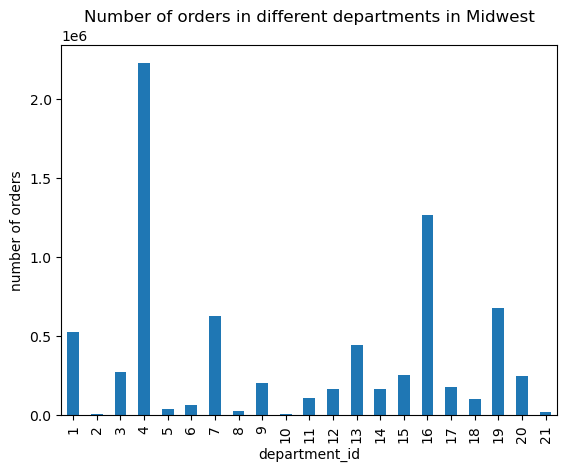

In [58]:
# Create a bar chart based on the first column (Midwest) of 'ct_dept_orders_vs_region' above
bar_dept_orders_midwest = ct_dept_orders_vs_region.iloc[:, 0].plot.bar(title = 'Number of orders in different departments in Midwest', xlabel = 'department_id', ylabel = 'number of orders')

In [59]:
# Export bar_dept_orders_midwest
bar_dept_orders_midwest.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.3', 'Q5.3_08 (bar) dept_orders_midwest.png'))

#### Q5.3_09. Bar chart: department orders in Northeast

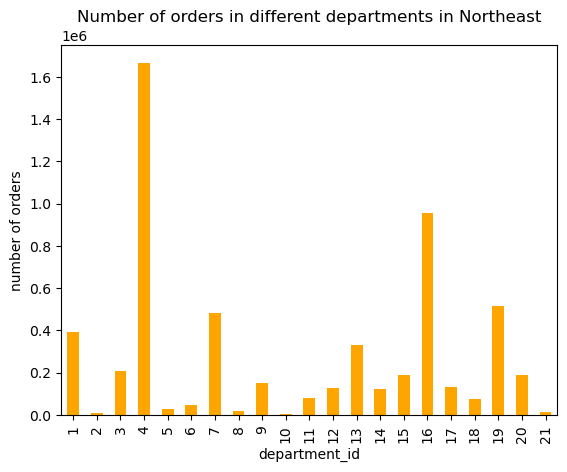

In [60]:
# Create a bar chart based on the second column (Northeast) of 'ct_dept_orders_vs_region' above
bar_dept_orders_northeast = ct_dept_orders_vs_region.iloc[:, 1].plot.bar(title = 'Number of orders in different departments in Northeast', xlabel = 'department_id', ylabel = 'number of orders', color = ['orange'])

In [61]:
# Export bar_dept_orders_northeast
bar_dept_orders_northeast.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.3', 'Q5.3_09 (bar) dept_orders_northeast.png'))

#### Q5.3_10. Bar chart: department orders in South

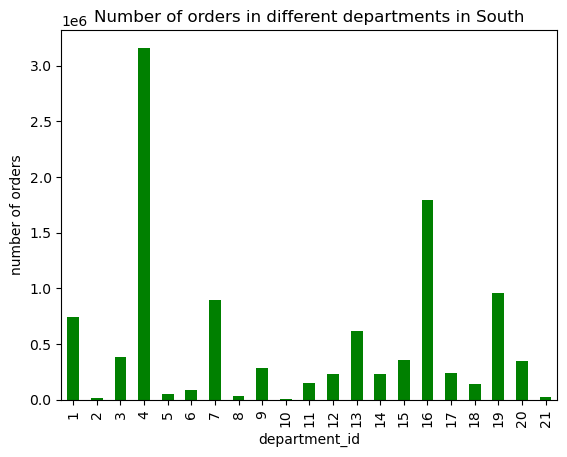

In [62]:
# Create a bar chart based on the third column (South) of 'ct_dept_orders_vs_region' above
bar_dept_orders_south = ct_dept_orders_vs_region.iloc[:, 2].plot.bar(title = 'Number of orders in different departments in South', xlabel = 'department_id', ylabel = 'number of orders', color = ['green'])

In [63]:
# Export bar_dept_orders_south
bar_dept_orders_south.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.3', 'Q5.3_10 (bar) dept_orders_south.png'))

#### Q5.3_11. Bar chart: department orders in West

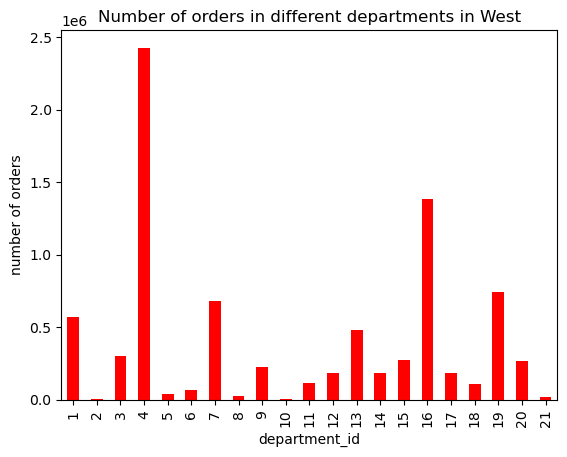

In [64]:
# Create a bar chart based on the forth column (West) of 'ct_dept_orders_vs_region' above
bar_dept_orders_west = ct_dept_orders_vs_region.iloc[:, 3].plot.bar(title = 'Number of orders in different departments in West', xlabel = 'department_id', ylabel = 'number of orders', color = ['red'])

In [65]:
# Export bar_dept_orders_west
bar_dept_orders_west.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.3', 'Q5.3_11 (bar) dept_orders_west.png'))

### (Q5.4) Is there a connection between age and family status in terms of ordering habits?
- Compare the min, max, and mean age of each family status for high spenders and low spenders
- Compare the min, max, and mean age of each family status for frequent customers, regular customers, and non-frequent customers

#### Compare the min, max, and mean age of each family status for high spenders and low spenders

In [84]:
# Min, max, and mean age of each family status for high spenders
ords_prods_all.loc[ords_prods_all['spender_flag'] == 'High spender'].groupby('family_status').agg({'age' : ['min', 'max', 'mean']})

age               
                                 min max       mean
family_status                                      
divorced/widowed                  60  81  71.959209
living with parents and siblings  18  21  19.268388
married                           22  81  51.886575
single                            18  59  40.310629

In [85]:
# Min, max, and mean age of each family status for low spenders
ords_prods_all.loc[ords_prods_all['spender_flag'] == 'Low spender'].groupby('family_status').agg({'age' : ['min', 'max', 'mean']})

age               
                                 min max       mean
family_status                                      
divorced/widowed                  60  81  70.507460
living with parents and siblings  18  21  19.504590
married                           22  81  51.485209
single                            18  59  38.590130

#### Compare the min, max, and mean age of each family status for frequent customers, regular customers, and non-frequent customers

In [86]:
# Min, max, and mean age of each family status for frequent customers
ords_prods_all.loc[ords_prods_all['order_frequency_flag'] == 'Frequent customer'].groupby('family_status').agg({'age' : ['min', 'max', 'mean']})

age               
                                 min max       mean
family_status                                      
divorced/widowed                  60  81  70.529244
living with parents and siblings  18  21  19.503843
married                           22  81  51.487248
single                            18  59  38.726998

In [87]:
# Min, max, and mean age of each family status for regular customers
ords_prods_all.loc[ords_prods_all['order_frequency_flag'] == 'Regular customer'].groupby('family_status').agg({'age' : ['min', 'max', 'mean']})

age               
                                 min max       mean
family_status                                      
divorced/widowed                  60  81  70.495742
living with parents and siblings  18  21  19.493218
married                           22  81  51.467610
single                            18  59  38.364746

In [88]:
# Min, max, and mean age of each family status for non-frequent customers
ords_prods_all.loc[ords_prods_all['order_frequency_flag'] == 'Non-frequent customer'].groupby('family_status').agg({'age' : ['min', 'max', 'mean']})

age               
                                 min max       mean
family_status                                      
divorced/widowed                  60  81  70.448230
living with parents and siblings  18  21  19.522452
married                           22  81  51.520445
single                            18  59  38.302796